Credits to: Xander Carruth, Hosung Hwang, and Utsab Ray

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout

from tensorflow.keras import regularizers

from keras.optimizers import SGD, Adam, RMSprop

from zipfile import ZipFile
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# upload files
from google.colab import files

uploaded = files.upload()

Saving asl_alphabet_train.zip to asl_alphabet_train.zip


In [ ]:
file_name = '/content/asl_alphabet_train.zip' #put path name here

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
datagen = ImageDataGenerator(validation_split=0.2)
training_files = '/content/asl_alphabet_train' #put path name here
train_generator = datagen.flow_from_directory(training_files,
                                              shuffle=True,
                                              target_size=(224,224),
                                              batch_size=256,
                                              class_mode='categorical',
                                              subset="training")
val_generator = datagen.flow_from_directory(training_files,
                                              shuffle=True,
                                              target_size=(224,224),
                                              batch_size=256,
                                              class_mode='categorical',
                                              subset="validation")

Found 233 images belonging to 29 classes.
Found 58 images belonging to 29 classes.


In [ ]:
train_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

In [ ]:
model=Sequential()
model.add(Conv2D(64, kernel_size=2, activation='relu', strides=2, input_shape=[224,224,3]))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=2, activation='relu', strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=2, activation='relu', strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(29,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 64)      832       
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 64)        16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

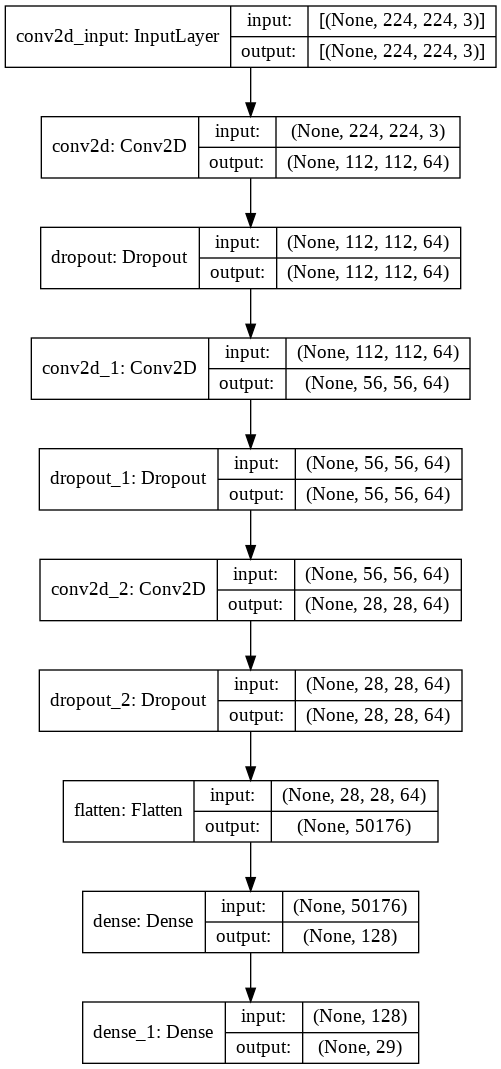

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model_history = model.fit(train_generator, epochs=15, validation_data=val_generator, verbose=1)

Epoch 1/15
1/1 [==============================] - 9s 9s/step - loss: 54.8472 - accuracy: 0.0258 - val_loss: 532.2512 - val_accuracy: 0.0345
Epoch 2/15
1/1 [==============================] - 6s 6s/step - loss: 636.7477 - accuracy: 0.0343 - val_loss: 341.2848 - val_accuracy: 0.0345
Epoch 3/15
1/1 [==============================] - 6s 6s/step - loss: 442.8737 - accuracy: 0.0343 - val_loss: 314.8786 - val_accuracy: 0.0345
Epoch 4/15
1/1 [==============================] - 6s 6s/step - loss: 456.0352 - accuracy: 0.0343 - val_loss: 192.2634 - val_accuracy: 0.0345
Epoch 5/15
1/1 [==============================] - 6s 6s/step - loss: 315.0832 - accuracy: 0.0558 - val_loss: 94.2410 - val_accuracy: 0.0345
Epoch 6/15
1/1 [==============================] - 6s 6s/step - loss: 188.1194 - accuracy: 0.0343 - val_loss: 43.5090 - val_accuracy: 0.0345
Epoch 7/15
1/1 [==============================] - 6s 6s/step - loss: 121.7100 - accuracy: 0.0343 - val_loss: 24.0296 - val_accuracy: 0.0345
Epoch 8/15
1/1 [=

In [ ]:
file_name = '/content/asl_alphabet_test.zip' #put path name here

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
testing_files = '/content/asl_alphabet_test'

In [ ]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(testing_files,
                                              shuffle=True,
                                              target_size=(224,224),
                                              batch_size=256,
                                              class_mode=None)

Found 28 images belonging to 1 classes.


In [ ]:
test_generator.class_indices

{'Test': 0}

In [ ]:
predictions = model.predict(test_generator)

In [ ]:
# create CSV file
np.savetxt("asl_prediction.csv", np.argmax(predictions,axis=1), delimiter=",")

In [ ]:
print(np.argmax(predictions,axis=1))

[11 10 10 10 11 25 11 11 11 24 25 11 11 11 10 11  9 10  9 11 11 11 10  6
 11 11 13 11]
